<a href="https://colab.research.google.com/github/MahimaRamireddy/MahimaRamireddy.github.io/blob/main/2D%20Vision%20Transformer/Vision_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install PyTorch and Torchvision
!pip install torch torchvision

# Install timm (PyTorch Image Models)
!pip install timm

# Install matplotlib
!pip install matplotlib

!pip install numpy

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
# Import libraries
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import timm
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Subset

In [ ]:
# Define hyperparameters
batch_size = 32
num_classes = 10
learning_rate = 1e-4
num_epochs = 5

In [ ]:
# Define data transforms
transform = transforms.Compose([
    transforms.Resize(224),  # Resize images to 224x224
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
# Load full CIFAR-10 datasets
full_train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
full_test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)


Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Define a function to create mini datasets
def create_mini_dataset(full_dataset, mini_size):
    indices = np.random.choice(len(full_dataset), mini_size, replace=False)
    mini_dataset = Subset(full_dataset, indices)
    return mini_dataset

# Define the size of the mini datasets
mini_train_size = 5000  # 1000 training samples
mini_test_size = 1000    # 200 test samples

# Create mini datasets
mini_train_dataset = create_mini_dataset(full_train_dataset, mini_train_size)
mini_test_dataset = create_mini_dataset(full_test_dataset, mini_test_size)


In [ ]:
# Define data loaders
train_loader = torch.utils.data.DataLoader(mini_train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(mini_test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
# Load a pre-trained model from timm
model = timm.create_model('resnet18', pretrained=True, num_classes=num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# Training loop
model.train()
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [1/157], Loss: 2.2993
Epoch [1/5], Step [2/157], Loss: 2.2877
Epoch [1/5], Step [3/157], Loss: 2.3215
Epoch [1/5], Step [4/157], Loss: 2.3015
Epoch [1/5], Step [5/157], Loss: 2.2981
Epoch [1/5], Step [6/157], Loss: 2.3905
Epoch [1/5], Step [7/157], Loss: 2.3038
Epoch [1/5], Step [8/157], Loss: 2.2621
Epoch [1/5], Step [9/157], Loss: 2.2920
Epoch [1/5], Step [10/157], Loss: 2.2865
Epoch [1/5], Step [11/157], Loss: 2.3059
Epoch [1/5], Step [12/157], Loss: 2.2473
Epoch [1/5], Step [13/157], Loss: 2.2545
Epoch [1/5], Step [14/157], Loss: 2.3356
Epoch [1/5], Step [15/157], Loss: 2.2942
Epoch [1/5], Step [16/157], Loss: 2.2932
Epoch [1/5], Step [17/157], Loss: 2.3044
Epoch [1/5], Step [18/157], Loss: 2.3222
Epoch [1/5], Step [19/157], Loss: 2.3017
Epoch [1/5], Step [20/157], Loss: 2.2612
Epoch [1/5], Step [21/157], Loss: 2.2844
Epoch [1/5], Step [22/157], Loss: 2.3227
Epoch [1/5], Step [23/157], Loss: 2.2986
Epoch [1/5], Step [24/157], Loss: 2.2712
Epoch [1/5], Step [25/157

In [ ]:
# Testing loop
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the {mini_test_size} test images: {100 * correct / total} %')

Accuracy of the model on the 1000 test images: 84.5 %


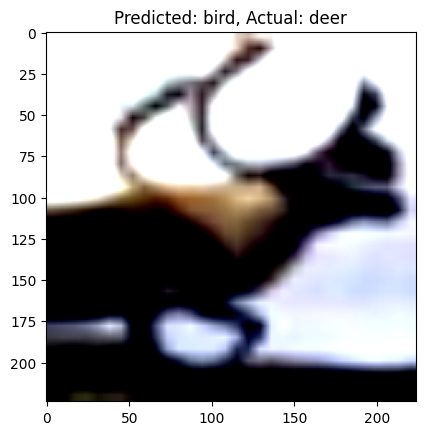

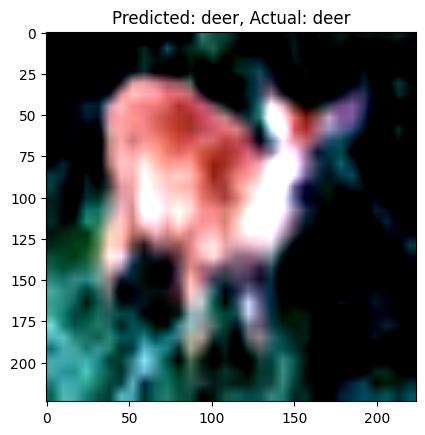

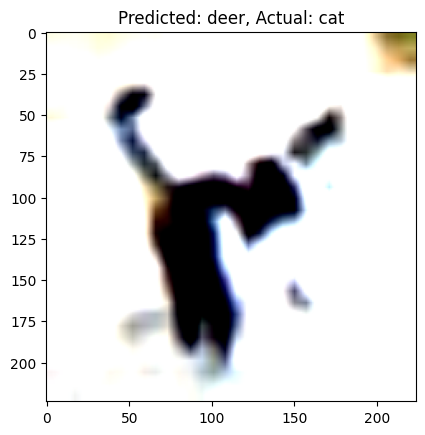

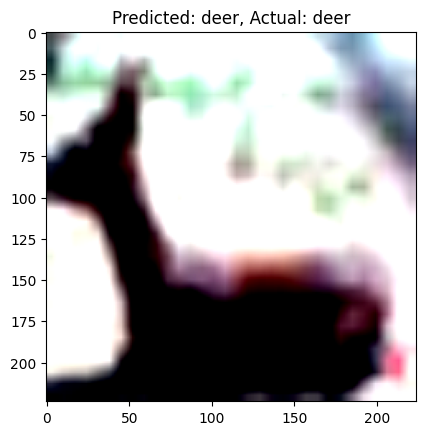

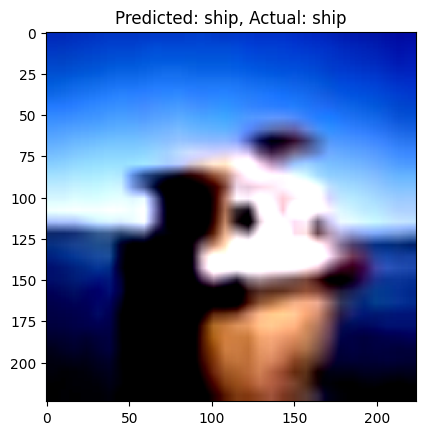

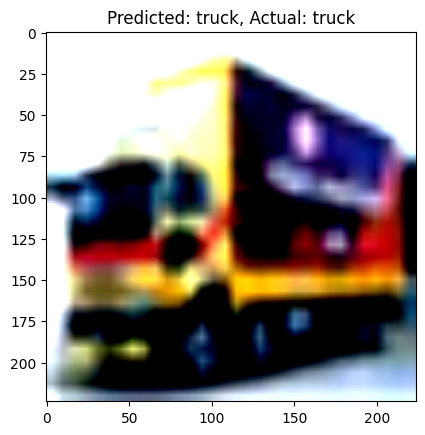

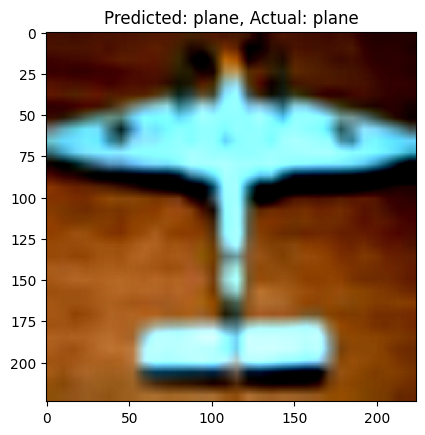

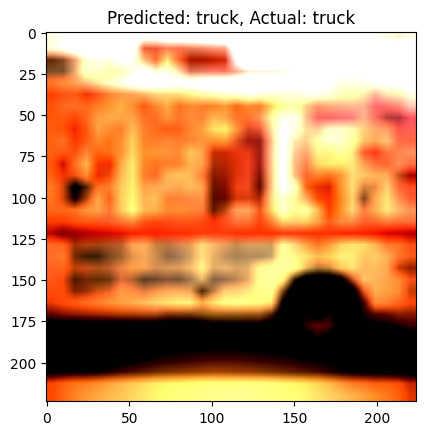

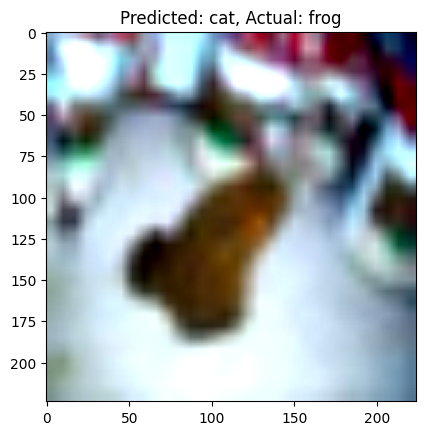

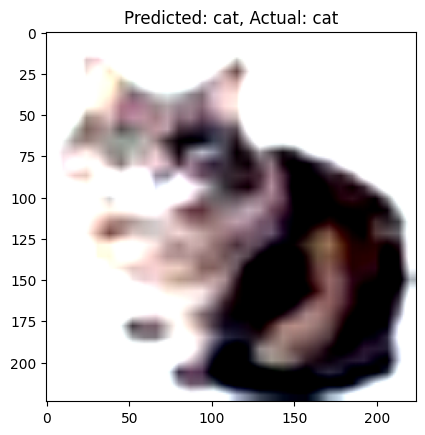

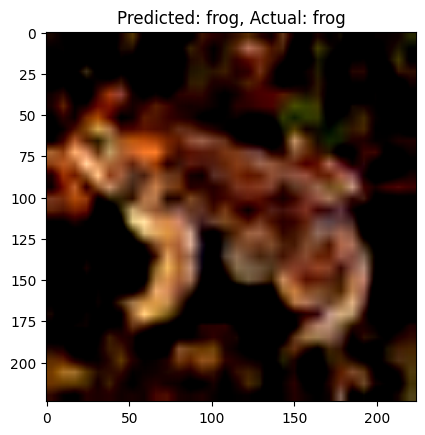

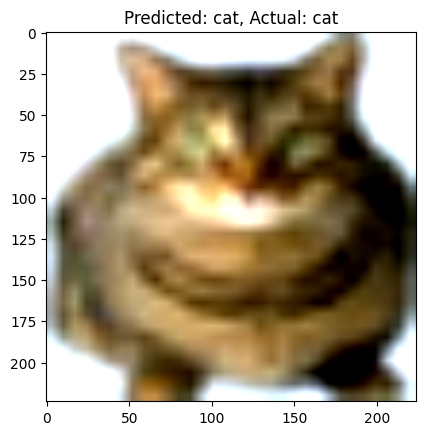

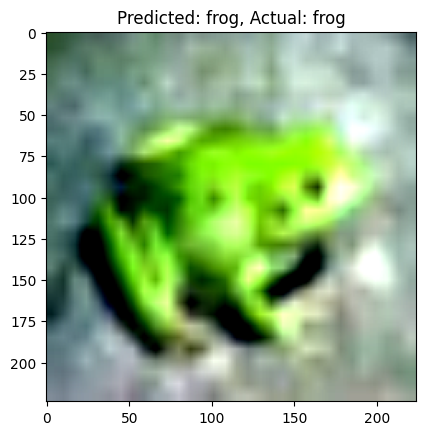

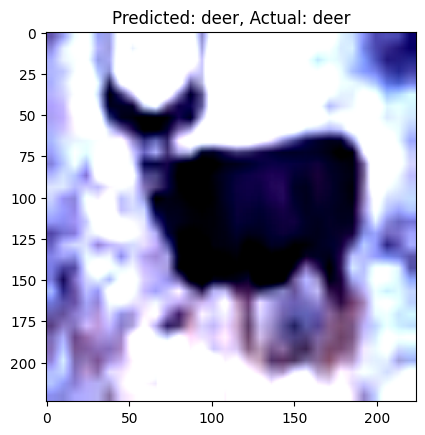

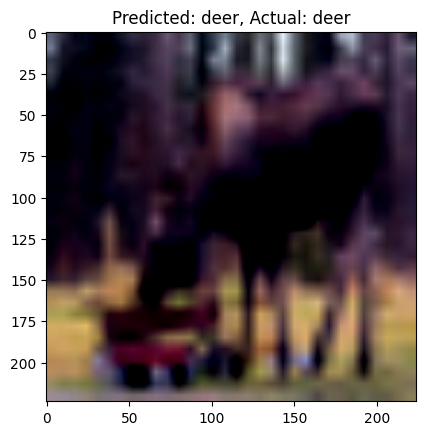

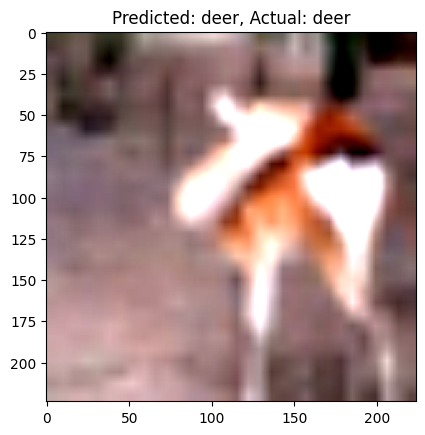

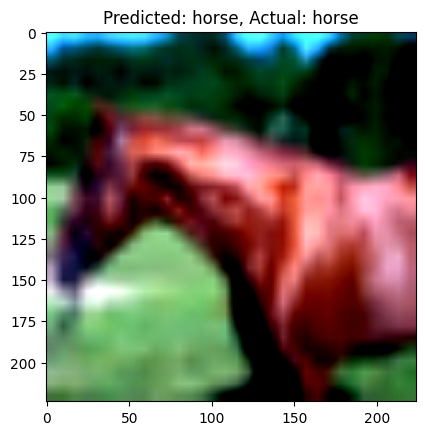

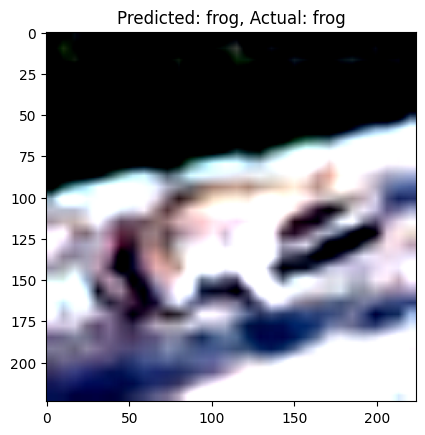

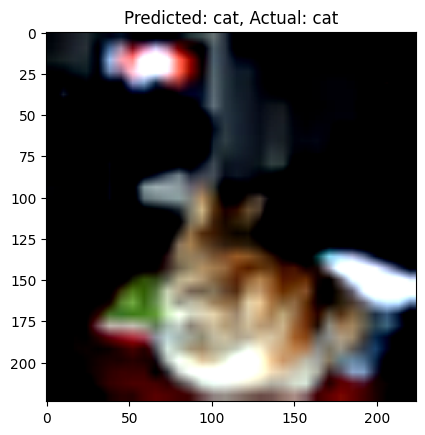

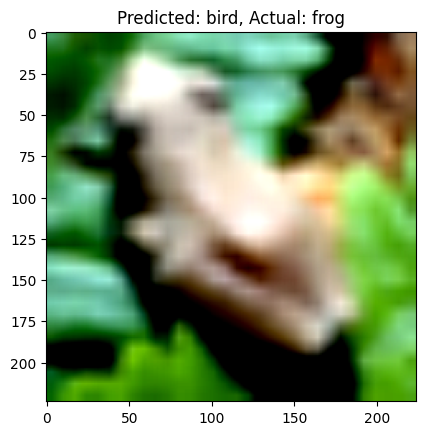

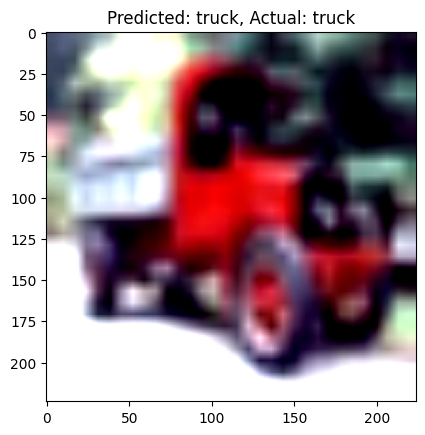

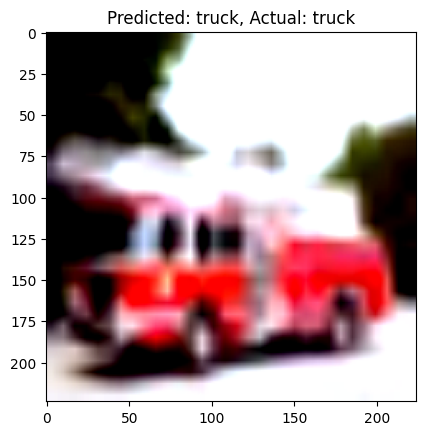

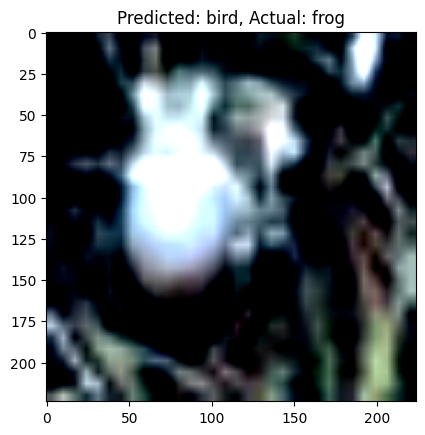

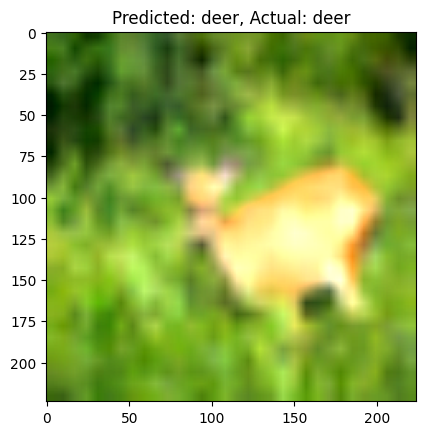

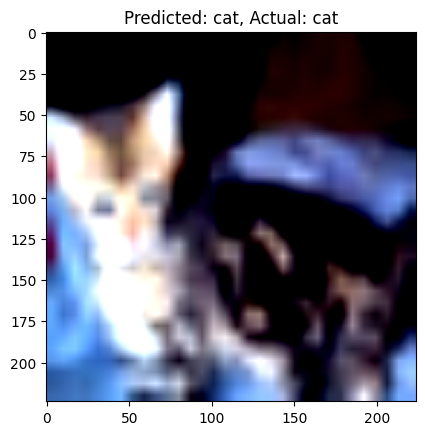

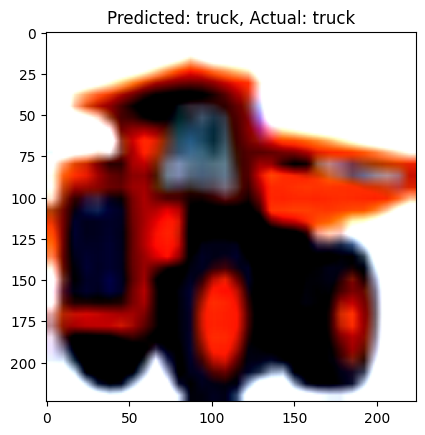

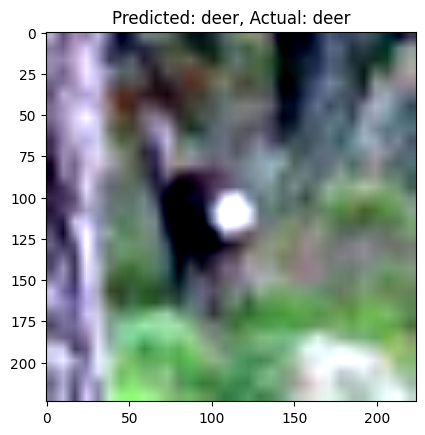

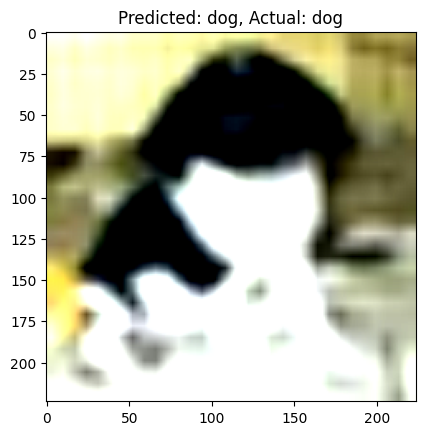

In [ ]:
# Plot each test image with its prediction
def imshow(img, title):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

# Get some random test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Print images and predicted labels
outputs = model(images)
_, predicted = torch.max(outputs, 1)

for i in range(images.size(0)):
    imshow(images[i], f'Predicted: {classes[predicted[i]]}, Actual: {classes[labels[i]]}')